# Nigerian Music scraped from Spotify - an analysis

Start where we finished in the last lesson, with data imported and filtered.

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df = pd.read_csv("../data/nigerian-songs.csv")
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4


We will focus only on 3 genres. Maybe we can get 3 clusters built!

Text(0.5, 1.0, 'Top genres')

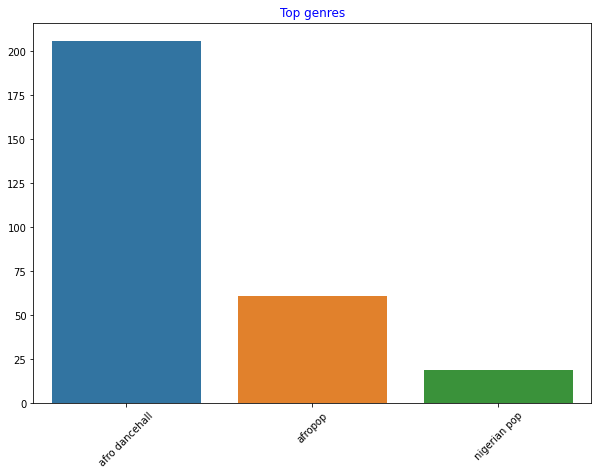

In [2]:
df = df[(df['artist_top_genre'] == 'afro dancehall') | (df['artist_top_genre'] == 'afropop') | (df['artist_top_genre'] == 'nigerian pop')]
df = df[(df['popularity'] > 0)]
top = df['artist_top_genre'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=top.index,y=top.values)
plt.xticks(rotation=45)
plt.title('Top genres',color = 'blue')

In [3]:
df.head()

,name,album,artist,artist_top_genre,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4
5,Kasala,Pioneers,DRB Lasgidi,nigerian pop,2020,184800,26,0.803,0.1270,0.525,0.000007,0.1290,-10.034,0.1970,100.103,4
6,Pull Up,Everything Pretty,prettyboydo,nigerian pop,2018,202648,29,0.818,0.4520,0.587,0.004490,0.5900,-9.840,0.1990,95.842,4


In [4]:
df.columns

Index(['name', 'album', 'artist', 'artist_top_genre', 'release_date', 'length',
       'popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature'],
      dtype='object')

In [5]:
X = df[['danceability', 'acousticness', 'energy',
        'instrumentalness', 'liveness', 'loudness', 'speechiness']]

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters=5, n_init='auto', random_state=123)

In [8]:
km.fit(X)

KMeans(n_clusters=5, n_init='auto', random_state=123)

In [9]:
clusters = km.predict(X)

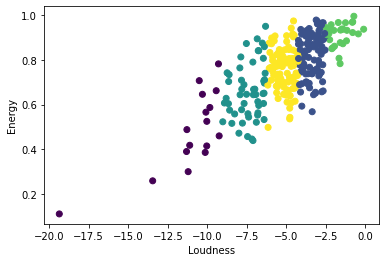

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X.loudness, X.energy, c = clusters)
plt.xlabel("Loudness")
plt.ylabel("Energy")
plt.show()

In [11]:
X['cluster'] = clusters

C:\Users\HP\AppData\Local\Temp\ipykernel_16836\147519958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = clusters


In [12]:
X.groupby('cluster').mean()

,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness
cluster,,,,,,,
0,0.752812,0.377437,0.481375,0.002427,0.194594,-11.044313,0.179163
1,0.757299,0.247007,0.820784,0.011497,0.129914,-3.401155,0.122154
2,0.755731,0.270775,0.658308,0.016851,0.139106,-7.374404,0.133531
3,0.700828,0.223292,0.913379,0.000938,0.156352,-1.612966,0.151734
4,0.740348,0.274102,0.758228,0.017339,0.146040,-5.115522,0.121833


In [13]:
X.groupby('cluster').std()

,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness
cluster,,,,,,,
0,0.115786,0.204783,0.176470,0.006769,0.143508,2.450162,0.131484
1,0.109136,0.205641,0.097488,0.084728,0.109827,0.503348,0.083300
2,0.099728,0.218754,0.124781,0.069559,0.102662,0.816452,0.099281
3,0.107425,0.179404,0.049222,0.003866,0.138638,0.651046,0.089817
4,0.121110,0.195053,0.094986,0.099730,0.108782,0.548338,0.094143


In [14]:
km.inertia_

213.5844744152384

In [15]:
ks = [2,3,4,5,6,7,8]
inertias = []

for k in ks:
    km = KMeans(n_clusters=k, n_init='auto', random_state=123)
    km.fit(X)
    inertia = km.inertia_
    inertias.append(inertia)

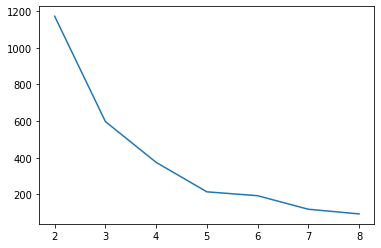

In [16]:
plt.plot(ks, inertias)

In [17]:
X[X['loudness']<-18]

,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,cluster
26,0.76,0.229,0.111,0.00119,0.129,-19.362,0.044,0


In [18]:
df.iloc[26]

name                  Duduke
album                 Duduke
artist                  Simi
artist_top_genre     afropop
release_date            2020
length                172000
popularity                60
danceability           0.781
acousticness           0.552
energy                 0.656
instrumentalness    0.000052
liveness               0.131
loudness              -4.105
speechiness            0.106
tempo                 96.083
time_signature             4
Name: 40, dtype: object